# Logistic Regression

## Part 1 - Data Preprocessing

### Importing the dataset

In [85]:
import pandas as pd
dataset = pd.read_csv('Customer-survey-data.csv')

In [86]:
dataset.head()

,Customer,How satisfied were you with your overall delivery experience at Ali? 1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied,How satisfied were you with the quality of the food at Alis? 1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied,How satisfied were you with the speed of delivery at Alis? 1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied,Was your order accurate? Please respond yes or no.
0,1,5.0,3.0,4.0,Yes
1,2,3.0,4.0,3.0,Yes
2,3,4.0,5.0,2.0,Yes
3,4,5.0,3.0,4.0,Yes
4,5,2.0,5.0,1.0,Yes


In [87]:
dataset = dataset.rename(columns={'Customer': 'Customer',
       'How satisfied were you with your overall delivery experience at Ali?                    1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied': 'delivery',
       'How satisfied were you with the quality of the food at Alis?                             1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied': 'food',
       'How satisfied were you with the speed of delivery at Alis?                                1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied': 'time',
       'Was your order accurate? Please respond yes or no.': 'Order_Accuracy'})
dataset

,Customer,delivery,food,time,Order_Accuracy
0,1,5.0,3.0,4.0,Yes
1,2,3.0,4.0,3.0,Yes
2,3,4.0,5.0,2.0,Yes
3,4,5.0,3.0,4.0,Yes
4,5,2.0,5.0,1.0,Yes
...,...,...,...,...,...
10611,10612,4.0,2.0,3.0,Yes
10612,10613,3.0,3.0,3.0,Yes
10613,10614,5.0,3.0,3.0,Yes
10614,10615,3.0,3.0,3.0,Yes


In [88]:
# Convert 'Yes'/'No' responses in the 'correct_order' column to binary values (1 for 'Yes', 0 for 'No')
dataset['Order_Accuracy'] = dataset['Order_Accuracy'].apply(lambda x: 1 if x == 'Yes' else 0 if x == 'No' else x)
dataset

,Customer,delivery,food,time,Order_Accuracy
0,1,5.0,3.0,4.0,1.0
1,2,3.0,4.0,3.0,1.0
2,3,4.0,5.0,2.0,1.0
3,4,5.0,3.0,4.0,1.0
4,5,2.0,5.0,1.0,1.0
...,...,...,...,...,...
10611,10612,4.0,2.0,3.0,1.0
10612,10613,3.0,3.0,3.0,1.0
10613,10614,5.0,3.0,3.0,1.0
10614,10615,3.0,3.0,3.0,1.0


In [89]:
# Check for NaN values in each column of the dataset
nan_counts = dataset.isna().sum()
print(nan_counts)

Customer            0
delivery          418
food              252
time              239
Order_Accuracy    660
dtype: int64


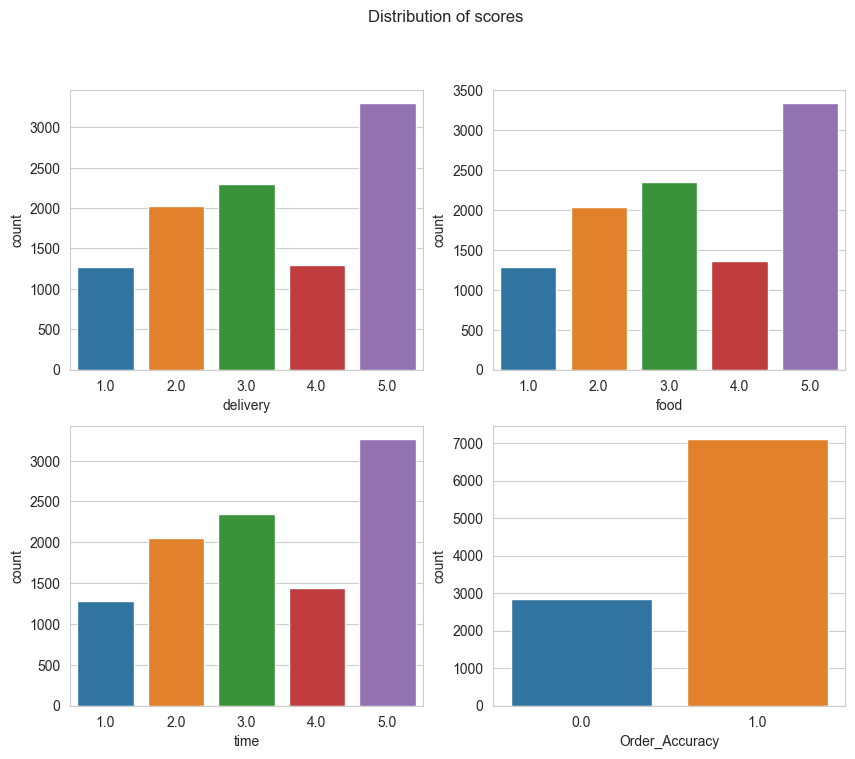

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
fig, ax = plt.subplots(2, 2, figsize=(10, 8))

# Use countplot with 'viridis' palette, assigning the 'x' variable to 'hue' and setting legend=False
sns.countplot(data=dataset, x='delivery', hue='delivery', ax=ax[0, 0], palette='tab10', legend=False)
sns.countplot(data=dataset, x='food', hue='food', ax=ax[0, 1], palette='tab10', legend=False)
sns.countplot(data=dataset, x='time', hue='time', ax=ax[1, 0], palette='tab10', legend=False)
sns.countplot(data=dataset, x='Order_Accuracy', hue='Order_Accuracy', ax=ax[1, 1], palette='tab10', legend=False)

plt.suptitle('Distribution of scores')
plt.show()

In [91]:
# Fill NaN values in each column with the median of that column
for col in dataset: 
    dataset[col] = dataset[col].fillna(dataset[col].median())

In [92]:
# Check for NaN values after filling
print("NaN values in dataset after handling:\n", dataset.isna().sum())

NaN values in dataset after handling:
 Customer          0
delivery          0
food              0
time              0
Order_Accuracy    0
dtype: int64


In [93]:
# Check fate types
dataset.dtypes

Customer            int64
delivery          float64
food              float64
time              float64
Order_Accuracy    float64
dtype: object

In [94]:
dataset.shape

(10616, 5)

In [95]:
dataset.describe()

,Customer,delivery,food,time,Order_Accuracy
count,10616.000000,10616.000000,10616.000000,10616.000000,10616.000000
mean,5308.500000,3.312453,3.324133,3.315656,0.732008
std,3064.719563,1.392957,1.398730,1.393790,0.442934
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2654.750000,2.000000,2.000000,2.000000,0.000000
50%,5308.500000,3.000000,3.000000,3.000000,1.000000
75%,7962.250000,5.000000,5.000000,5.000000,1.000000
max,10616.000000,5.000000,5.000000,5.000000,1.000000


### Getting the inputs and output

In [96]:
X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

In [97]:
# Check original shapes
print("Original X shape:", X.shape)
print("Original y shape:", y.shape)

Original X shape: (10616, 3)
Original y shape: (10616,)


In [98]:
X

array([[5., 3., 4.],
       [3., 4., 3.],
       [4., 5., 2.],
       ...,
       [5., 3., 3.],
       [3., 3., 3.],
       [1., 3., 3.]])

In [99]:
y

array([1., 1., 1., ..., 1., 1., 1.])

### Creating the Training Set and the Test Set

In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [101]:
X_train

array([[5., 5., 5.],
       [3., 3., 3.],
       [5., 5., 5.],
       ...,
       [5., 3., 3.],
       [3., 5., 3.],
       [1., 3., 5.]])

In [102]:
X_test

array([[3., 3., 3.],
       [2., 2., 5.],
       [4., 3., 3.],
       ...,
       [5., 5., 5.],
       [3., 3., 3.],
       [4., 4., 1.]])

In [103]:
y_train

array([1., 1., 1., ..., 1., 0., 1.])

In [104]:
y_test

array([1., 1., 0., ..., 0., 1., 1.])

### Feature Scaling

In [105]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

In [106]:
X_train

array([[ 1.21762205,  1.20312471,  1.21596761],
       [-0.21999303, -0.22581725, -0.21660688],
       [ 1.21762205,  1.20312471,  1.21596761],
       ...,
       [ 1.21762205, -0.22581725, -0.21660688],
       [-0.21999303,  1.20312471, -0.21660688],
       [-1.6576081 , -0.22581725,  1.21596761]])

## Part 2 - Building and training the model

### Building the model

In [107]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state = 0)

### Training the model

In [108]:
model.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [109]:
from sklearn.linear_model import LogisticRegression

# Set class_weight to 'balanced' to address class imbalance
model = LogisticRegression(random_state=0, class_weight='balanced')

# Train the model on the original X_train_scaled, y_train
model.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', random_state=0)

### Inference

Making the predictons of the data points in the test set

In [110]:
y_pred = model.predict(sc.transform(X_test))

In [111]:
y_pred

array([0., 1., 1., ..., 1., 0., 0.])

In [112]:
model.predict(sc.transform([[1,2,3]]))

array([1.])

## Part 3: Evaluating the model 

In [113]:
# Predict on the test set
y_pred = model.predict(X_test)

### Confusion Matrix

In [114]:
from sklearn.metrics import confusion_matrix
### Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[  39  522]
 [ 134 1429]]


### Accuracy

In [115]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6911487758945386

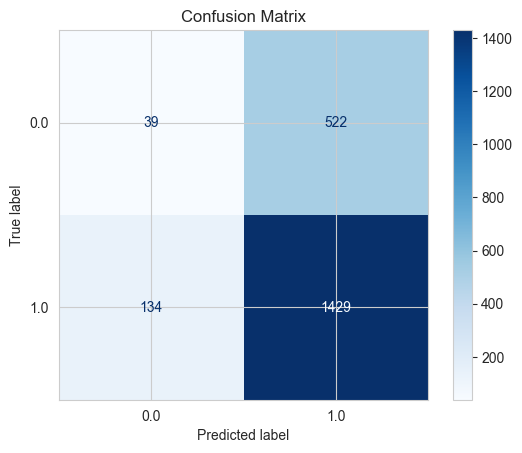

In [116]:
### Visualizing the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()  # Show the plot